[//]: # "Para temas claros usar logo_utn.svg"
<img src="./logo_utn_dark.png" align="right" width="250" /> 

# Análisis de Montecarlo en LTspice para la topología Sallen-Key

#### Por Mariano Llamedo Soria

## Resumen

En este documento se analizará un filtro pasabajos Sallen-Key, obteniendo su función transferencia y analizando sus parámetros críticos mediantes el estudio de la sensibilidad. Luego se profundiza este análisis mediante una simulacion numérica y circuital de tipo Montecarlo, para finalmente extraer algunas conclusiones.


<a id='indice'></a>


## Índice

El siguiente índice permitirá navegar por las secciones del documento con mayor facilidad.


1. [Introducción](#0.a)

2. Simulación circuital.

    a. [Circuito analizado](#3.a).

    b. [Resultados cualitativos (gráficas)](#3.b).

    c. [Análisis de las mediciones automáticas](#3.c).

    d. [Resultados cuantitativos](#3.d).

    e. [Conclusiones de la simulación circuital](#3.e).



<a id='0.a'></a>

### 1) Introducción


En el siguiente documento se analizará la dispersión de parámetros:

 * Factor de selectividad ($Q$)
 * Frecuencia de corte o resonancia ($\omega_0$)
 * y la ganancia ($K$)

correspondiente a una topología Sallen-Key en su configuración pasabajo, mediante la siguiente red:


<img src="./sallenkey.png" align="center" width="700" style="border:10px solid white" /> 

Este circuito implementa la siguiente transferencia de tensión:

$$ T(s) =\frac{V_o}{V_i} = \frac{ K·\omega_0^2}{s^2 + s · \omega_0/Q + \omega_0^2} $$

En las siguientes secciones se describirá la relación entre los parámetros y los elementos circuitales.

Esta topología fue propuesta originalmente en 1955 por R. P. Sallen and E. L. Key del [laboratorio Lincoln](https://en.wikipedia.org/wiki/MIT_Lincoln_Laboratory), en el MIT [[wiki]](https://en.wikipedia.org/wiki/Sallen%E2%80%93Key_topology). Es uno de los primeros filtros activos publicados, y posiblemente uno de los más populares. Una de sus principales ventajas al momento de su publicación fue la posibilidad de diseñar filtros de orden superior de forma modular. Es decir que cada etapa podía diseñarse por separado debido al uso de seguidores de tensión, o lo que se consideró años después, la topología de filtos *fuente de tensión controlada por tensión* (VCVS por sus siglas en inglés). Otra ventaja importante es que necesita un solo dispositivo activo, en nuestro caso un *opamp*, aunque la publicación original se propuso un amplificador valvular en configuración de cátodo común. La idea original fue que el dispositivo activo funcione aproximadamente como un *buffer*, proveyendo separación de las secciones adyacentes (casi) sin atenuación de la señal. En el caso de la configuración actual, el *opamp* también permite obtener ganancia, como veremos más adelante. Ciertamente esta topología tiene varias desventajas, posiblemente la más notoria es su dificultad de implementar factores de selectividad (Q) elevados, como se analizará en este documento.

<a id='indice'></a>




Con esto se termina la demostración de las posibilidades de simulación simbólica de sympy.

Ahora se retoma el análisis de la transferencia para *opamp ideal*, como se analizó en las alternativas 1 y 2. La transferencia de tensión definida genéricamente

$$ T(s) = \frac{ K·\omega_0^2}{s^2 + s · \omega_0/Q + \omega_0^2} $$

siendo los parámetros

$$ \omega_0^2=\frac{G_1 G_2}{C^2} $$

$$ K=1+G_a/G_b $$

$$ Q=\frac{ \sqrt{G_1 G_2}}{G_1 + G_2(2-K)} $$

y para $R_1 = \frac{1}{G1} = R_2 = R_a = R $ llegamos a 

$$ \omega_0=\frac{1}{RC} $$

$$ Q=\frac{ 1}{3-K} $$

$$ K=1+R_b/R $$


<a id='3.a'></a>

### 2.a) Simulación circuital

En esta sección se realizarán las simulaciones finales, que tienen como objetivo corroborar los análisis realizados en las secciones previas, y eventualmente ampliar alguna simulación aprovechando el motor de simulación de [LTspice](https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html) y los modelos de componentes incluídos, especialmente los amplificadores operacionales.

Lo primero es dibujar la red respetando lo siguiente:

* usar el modelo ideal de opamp (.inc opamp.sub)

* asignar a los resistores y capacitores valores definidos mediante llaves {Cref}

* estos valores pueden ser un valor calculado a partir de variables (.param Cref=1u)

* o sampleados de una distribución mediante la función Montecarlo ({mc(Cref, 0.05)})

notar el uso de otras definiciones muy útiles para establecer normas de frecuencia y/o impedancia. Luego se configuran los siguientes análisis:

* Análisis de la respuesta en frecuencia (directiva .AC)

* cantidad de iteraciones de Montecarlo (directiva .step param run)

Finalmente y dado que la cantidad de realizaciones puede tornar impracticable la medición manual, se definen mediciones automáticas (directiva .meas) para la medición del $Q$, $\omega_0$ y $K$. Notar cómo se procede a medir cada parámetro:

* Lo primero es ubicar la $\omega_{0,i}$, es decir la frecuencia de corte de la i-ésima realización. Se propone medir la frecuencia a la que la fase atraviesa los $-\frac{\pi}{2}$ radianes (fo_meas).

* Luego se calcula el $Q_i$ en decibeles para el valor de la respuesta de módulo a la frecuencia **fo_meas**.

* Del mismo modo se mide el $K_i$ en decibeles para el valor de la respuesta de módulo a la **mínima frecuencia** analizada. En teoría lo hallaríamos para DC.

Los resultados de las mediciones automáticas son exportados automáticamente al archivo de *logueo de errores*, para finalmente proceder a su conversión a un formato de texto plano (CSV) posible de procesar mediante el módulo de procesamiento estadístico **pandas** (ver la invocación a *ltspice_measurements_parse.py*)

<img src="./Sallen-Key circuito.png" align="center" width="80%" /> 


[Volver al índice](#indice)

<a id='3.b'></a>

### 2.b) Resultados cualitativos 

Analizando la respuesta en frecuencia para los valores de Q (2, 4 y 8) analizados, se puede comparar visualmente como crece la dispersión para los factores de selectividad elevados (>3) según analizamos en las [expresiones de sensibilidad](#1.e) y la [simulación numérica](#2.b).

### Q=2

<img src="./Sallen-Key transferencia Q2.jpg" align="center" width="90%" /> 

### Q=4

<img src="./Sallen-Key transferencia Q4.jpg" align="center" width="90%" /> 

### Q=8

<img src="./Sallen-Key transferencia Q8.jpg" align="center" width="90%" /> 


[Volver al índice](#indice)

<a id='3.c'></a>

### 2.c) Análisis de las mediciones automáticas

Analizaremos ahora las mediciones automáticas realizadas en LTspice con la finalidad de realizar una comparación entre la simulación circuital y la numérica.


[Volver al índice](#indice)

[Volver al índice](#indice)

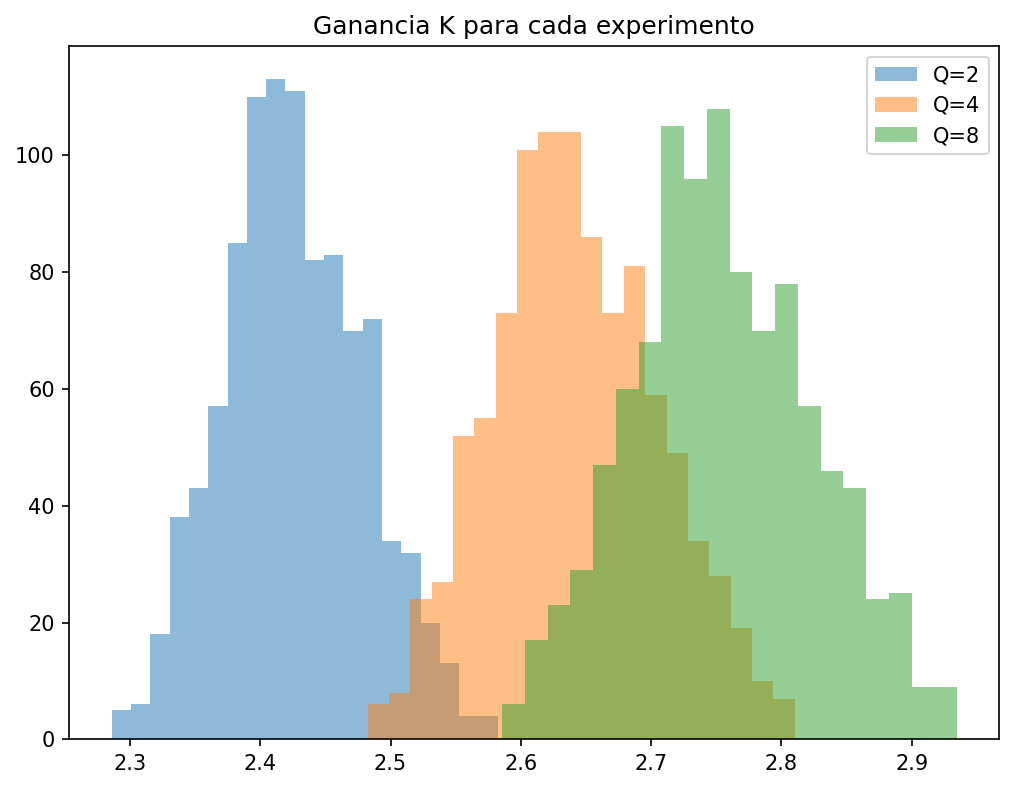

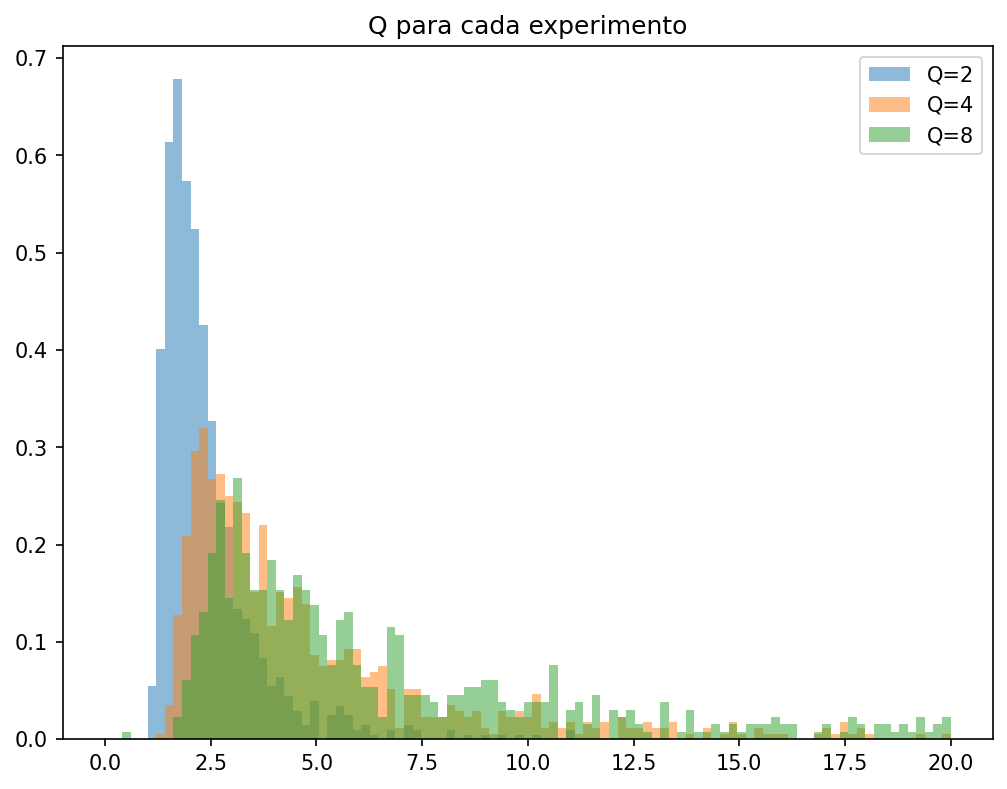

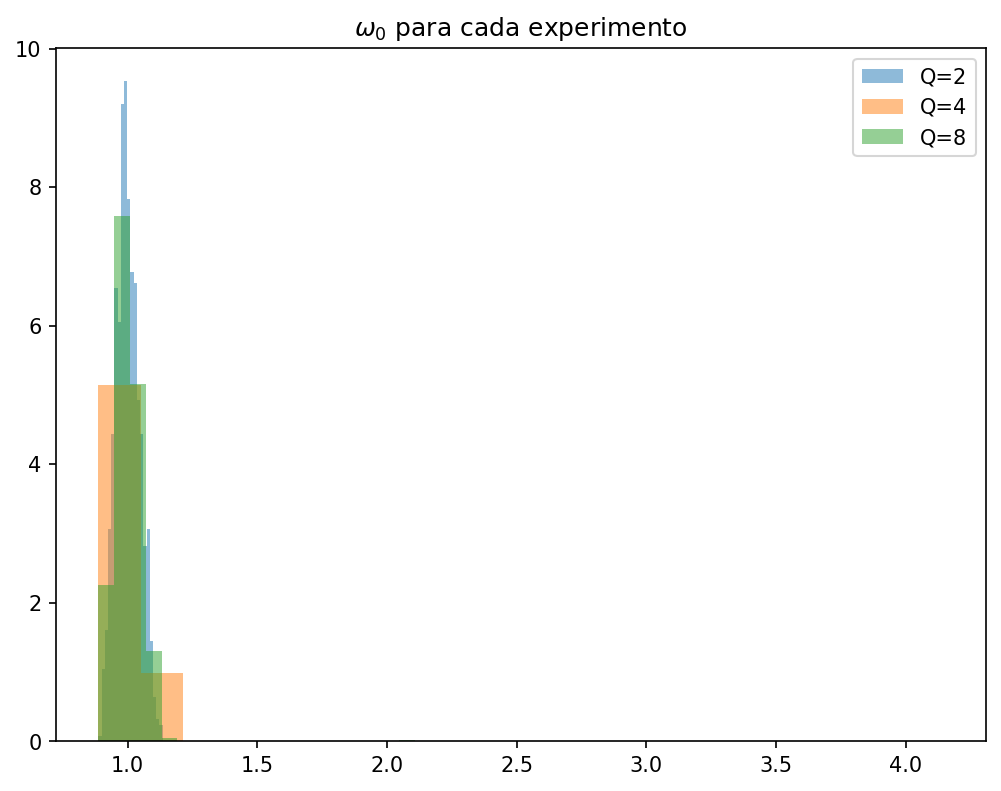

In [6]:
# Inicialización e importación de módulos

# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

# Módulos externos
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import TransferFunction

fig_sz_x = 8
fig_sz_y = 6
fig_dpi = 150 # dpi

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi

plt.figure(1)
plt.plot(np.random.rand(10))
plt.close(1)

# variable de Laplace
from IPython.display import display, Math, Markdown

# Ahora importamos las funciones de PyTC2
from pytc2.general import print_subtitle

# Pandas es un módulo para la gestión de tablas y análisis de datos
import pandas as pd


df = []
all_Qset = [2, 4, 8]


for ii in range(len(all_Qset)):
    # read the CSV file into a pandas dataframe
    df += [pd.read_csv('Sallen Key montecarlo Q{:d}.csv'.format(all_Qset[ii]))]

for ii in range(len(all_Qset)):
    plt.hist( df[ii]['k_meas'] , 20, alpha=0.5, label='Q={:d}'.format(all_Qset[ii]) )
plt.title('Ganancia K para cada experimento')
plt.legend()

plt.figure()
for ii in range(len(all_Qset)):
    # por como lo mido, tengo que dividir por el k. Porque mido T(wo) = k*Q
    plt.hist( df[ii]['q_meas']/df[ii]['k_meas'], np.linspace(0,20,100), density = True, alpha=0.5, label='Q={:d}'.format(all_Qset[ii]) )

plt.title('Q para cada experimento')
plt.legend()

plt.figure()
for ii in range(len(all_Qset)):
    #display( df[ii][np.bitwise_not( df[ii]['fo_meas'].isna())]['fo_meas'].describe())
    plt.hist( df[ii][np.bitwise_not( df[ii]['fo_meas'].isna())]['fo_meas'], 20, alpha=0.5, density = True, label='Q={:d}'.format(all_Qset[ii]) )

plt.title('$\omega_0$ para cada experimento')
plt.legend()

# enlace para volver al índice principal.
display(Markdown(r'[Volver al índice](#indice)'))

# display the plot
plt.show()


In [8]:

# enlace para presentar los resultados.
display(Markdown(r'<a id=''3.d''></a>'))

dfQ_ltspice = pd.concat([df[0]['q_meas']/df[0]['k_meas'], df[1]['q_meas']/df[1]['k_meas'], df[2]['q_meas']/df[2]['k_meas']], axis=1)
dfQ_ltspice.columns = all_Qset
    
print_subtitle('2.d) Descripción cuantitativa de los valores de Q')

display(dfQ_ltspice.describe())

# enlace para volver al índice principal.
display(Markdown(r'[Volver al índice](#indice)'))


<a id=3.d></a>

#### 2.d) Descripción cuantitativa de los valores de Q

,2,4,8
count,1000.000000,915.000000,739.000000
mean,2.410744,11.107356,12.907302
std,1.217642,57.843077,30.317894
min,1.066502,1.399457,0.469502
25%,1.664355,2.682068,3.518321
50%,2.089641,3.872848,5.510944
75%,2.692272,6.444561,10.641510
max,11.107927,1436.969334,510.352210


[Volver al índice](#indice)

<a id='3.e'></a>

### 2.e) Conclusiones de la simulación circuital

Como se puede observar, los resultados son concordantes entre métodos de simulación circuital, numérica y simbólica. Para todas las simulaciones se observaron las limitaciones de la red Sallen-Key para alcanzar factores de selectividad $Q>3$. Otra característica distintiva de la simulación circuital, es que los valores extremos de $Q$ fueron aún más extremos que en la simulación numérica, afectando en definitiva a los **valores medios** que también cambiaron significativamente (3 a 11 para $Q=4$ y 7 a 13 para $Q=8$). Lamentablemente al no poder analizar los valores de los componentes asignados por LTspice, no podemos estar seguros de que las condiciones analizadas sean exactamente las mismas que realizamos en Python. Otra característica del análisis Montecarlo en LTspice, fue que algunas realizaciones fueron **inestables**. Esto se evidencia en la menor cantidad de mediciones automáticas que hubo para los $Q>3$ (1000, 915 y 739 para Q = 2, 4 y 8 respectivamente).

[Volver al índice](#indice)